# 심화된 CNN 알고리즘 

In [2]:
# 심화된 CNN 알고리즘 
from tensorflow import keras
(train_x, train_y), (test_x, test_y) = keras.datasets.fashion_mnist.load_data()

In [6]:
train_x.shape         # 현재는 흑백데이터라 3차원

(60000, 28, 28)

In [7]:
# 개수/가로/세로/채널
train_scaled = train_x.reshape(-1, 28, 28, 1) / 255
test_scaled = test_x.reshape(-1, 28, 28, 1) / 255

# 깊게 탐색하는 CNN 알고리즘 (유사하게 구현)

## VGG Net: 작은(3x3) 컨볼루션 필터 + 맥스 풀링을 반복적으로 사용
이미지의 특징을 여러번 잡고 풀링

In [13]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = keras.Sequential([         # 인공신경망 만드는 도화지
    Input(shape = (28, 28, 1)),

    # 특징을 32번씩 여러번 잡고 맥스풀링
    Conv2D(32, kernel_size = (3,3), activation="relu", padding="same"),        # 필터는 32개, 커널사이즈는 3,3
    Conv2D(32, kernel_size = (3,3), activation="relu", padding="same"),
    MaxPooling2D((2,2)),       # 가로세로 사이즈를 1/2로 줄여줌

    # 특징을 64번씩 여러번 잡고 맥스풀링
    Conv2D(64, kernel_size = (3,3), activation="relu", padding="same"),        # 필터는 64개, 커널사이즈는 3,3
    Conv2D(64, kernel_size = (3,3), activation="relu", padding="same"),
    MaxPooling2D((2,2)),

    # 특징을 128번씩 여러번 잡고 맥스풀링
    Conv2D(128, kernel_size = (3,3), activation="relu", padding="same"), 
    Conv2D(128, kernel_size = (3,3), activation="relu", padding="same"),
    MaxPooling2D((2,2)),

    Flatten(),        # 은닉층에 노드를 넣어줘야 하니 쭉 펴준다
    Dense(128, activation="relu"),      # 은닉층
    # Dropout(0.3)    # 과대적합 나면 추가
    Dense(128, activation="relu"),      # 은닉층
    Dense(10, activation="softmax"),      # 출력층
])

model.summary()

# 가로,세로는 점점 줄어들고, 채널 수(정보량)은 점점 늘어난다  =  좁고 깊은 구조

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 7, 7, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 451,818 (1.72 MB)

 Trainable params: 451,818 (1.72 MB)

 Non-trainable params: 0 (0.00 B)

45만개의 파라미터를 구현해야한다

In [15]:
model.compile(loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'],
              optimizer = 'adam')

history = model.fit(train_scaled, train_y, epochs = 5,
                    # validation_data=(test_scaled, test_y),
                    validation_split=0.2)      # 검증데이터 따로 안만들고 훈련데이터 쪼개서 검증 가능

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.9163 - loss: 0.2258 - val_accuracy: 0.9203 - val_loss: 0.2251
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 29ms/step - accuracy: 0.9320 - loss: 0.1884 - val_accuracy: 0.9197 - val_loss: 0.2243
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 31ms/step - accuracy: 0.9398 - loss: 0.1626 - val_accuracy: 0.9241 - val_loss: 0.2073
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 33ms/step - accuracy: 0.9489 - loss: 0.1409 - val_accuracy: 0.9183 - val_loss: 0.2205
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 55s 36ms/step - accuracy: 0.9526 - loss: 0.1250 - val_accuracy: 0.9202 - val_loss: 0.2254


In [16]:
model.evaluate(test_scaled, test_y)

# 성능 91.7%

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9180 - loss: 0.2533


[0.24761055409908295, 0.9172999858856201]

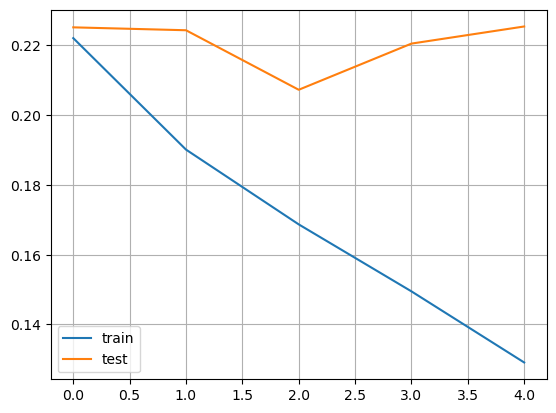

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train", "test"])
plt.grid()
plt.show()

# 모델이 단순해서 과적합이 발생했으나, 코드 느낌만 알기 

## ResNet: 여러개의 컨볼루션을 거쳐도 형태가 깨지지 않게. 
### 컨볼루션 레이어 이미지 + 원본 이미지 = Residual Block
형태도 유지하면서 특징도 저장할 수 있게 ; f(x) + x   


In [26]:
from keras.layers import BatchNormalization, Activation, Add, GlobalAveragePooling2D

def Residual_block(input_x, filters, stride=1):       # stride: 몇칸씩 움직여가며 특징을 잡는지
    x = input_x
    short_cut = input_x        # 나중에 더해주기 위해 따로 빼놓은것

    x = Conv2D(filters, kernel_size=(3,3), padding="same")(x)        # x를 통과시킨다?
    x = BatchNormalization()(x)
    x = Activation("relu")(x)         # relu에 x 통과시킴

    x = Conv2D(filters, kernel_size=(3,3), padding="same")(x)
    x = BatchNormalization()(x)

    x = Add()([x, short_cut])       # 컨볼루션 레이어 통과한 x와 원본 x 더해짐
    x = Activation("relu")(x)

    return x

In [32]:
inputs = Input(shape = (28, 28, 1))

x = Conv2D(32, kernel_size=(3,3), padding="same")(inputs)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = Residual_block(x, filters=32)        # 컨볼루션 층을 2번 거켰는데도 원본데이터를 유지
x = Residual_block(x, filters=32)        # 컨볼루션 층 또 2번 거침.  총 4번

x = Residual_block(x, filters=64, stride=2)    # 두칸씩 움직이면서 이미지의 특징을 64번 잡음
x = Residual_block(x, filters=64) 

x = GlobalAveragePooling2D()(x)

outputs = Dense(10, activation="softmax")(x)

ValueError: Inputs have incompatible shapes. Received shapes (28, 28, 64) and (28, 28, 32)

In [33]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt # 데이터 확인용
from tensorflow import keras

print("데이터 로드 및 전처리 시작...")
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# 이미지 데이터 형태 변환 (높이, 너비, 채널) 및 스케일링 (0-255 -> 0-1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1) # (60000, 28, 28) -> (60000, 28, 28, 1)
x_test = np.expand_dims(x_test, axis=-1)   # (10000, 28, 28) -> (10000, 28, 28, 1)

# 라벨을 원-핫 인코딩
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

def resnet_block(input_tensor, filters, stride=1):
    """ResNet 기본 잔차 블록"""
    x = input_tensor
    shortcut = input_tensor # 스킵 연결을 위한 원래 입력 저장

    # 첫 번째 컨볼루션 레이어
    x = Conv2D(filters, kernel_size=3, strides=stride, padding='same', kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x) # 배치 정규화
    x = Activation('relu')(x)   # ReLU 활성화 함수

    # 두 번째 컨볼루션 레이어
    x = Conv2D(filters, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x) # 배치 정규화

    # --- 스킵 연결 처리 ---
    # 만약 입력 텐서의 차원과 출력 텐서의 차원이 다르다면 (필터 수 증가 또는 스트라이드 > 1)
    # 스킵 연결 경로에 1x1 컨볼루션을 적용하여 차원을 맞춰줍니다.
    if stride != 1 or input_tensor.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=1, strides=stride, padding='valid', kernel_initializer='he_normal')(shortcut)
        shortcut = BatchNormalization()(shortcut) # 스킵 연결에도 배치 정규화 적용

    # 최종 출력 = 블록 결과 + 스킵 연결 결과
    x = Add()([x, shortcut]) # 두 텐서를 더함
    x = Activation('relu')(x) # 최종 활성화 함수

    return x

# --- 3. ResNet 모델 구성 ---
print("모델 구성 시작...")
input_shape = (28, 28, 1) # Fashion MNIST 이미지 입력 형태
inputs = Input(shape=input_shape) # 모델의 입력 레이어

# 초기 컨볼루션 레이어
x = Conv2D(32, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)

# ResNet 스테이지 (예시: 간단하게 2개의 스테이지 구성)
# 스테이지 1: 필터 수 32, 스트라이드 1 (다운샘플링 없음)
x = resnet_block(x, filters=32)
x = resnet_block(x, filters=32)

# 스테이지 2: 필터 수 64, 첫 번째 블록에서 스트라이드 2 (다운샘플링)
x = resnet_block(x, filters=64, stride=2) # 공간 크기 절반으로 줄어듦 (14x14)
x = resnet_block(x, filters=64)

# 마지막 레이어
# Global Average Pooling: 각 채널별 평균을 계산하여 공간 차원 제거
x = GlobalAveragePooling2D()(x)
# Dense 레이어: 분류를 위한 완전 연결 레이어
outputs = Dense(num_classes, activation='softmax', kernel_initializer='he_normal')(x)

# 모델 생성
model = Model(inputs=inputs, outputs=outputs)

model.summary() # 모델 구조 요약 출력
print("모델 구성 완료.")

데이터 로드 및 전처리 시작...
모델 구성 시작...


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)   │ (None, 28, 28, 1)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_46 (Conv2D)            │ (None, 28, 28, 32)        │             320 │ input_layer_12[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_22        │ (None, 28, 28, 32)        │             128 │ conv2d_46[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_21 (Activation)    │ (None, 28, 28, 32)        │               0 │ batch_normalization_22[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_47 (Conv2D)            │ (None, 28, 28, 32)        │           9,248 │ activation_21[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_23        │ (None, 28, 28, 32)        │             128 │ conv2d_47[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_22 (Activation)    │ (None, 28, 28, 32)        │               0 │ batch_normalization_23[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_48 (Conv2D)            │ (None, 28, 28, 32)        │           9,248 │ activation_22[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_24        │ (None, 28, 28, 32)        │             128 │ conv2d_48[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_7 (Add)                   │ (None, 28, 28, 32)        │               0 │ batch_normalization_24[0]… │
│                               │                           │                 │ activation_21[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_23 (Activation)    │ (None, 28, 28, 32)        │               0 │ add_7[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_49 (Conv2D)            │ (None, 28, 28, 32)        │           9,248 │ activation_23[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_25        │ (None, 28, 28, 32)        │             128 │ conv2d_49[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_24 (Activation)    │ (None, 28, 28, 32)        │               0 │ batch_normalization_25[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_50 (Conv2D)            │ (None, 28, 28, 32)        │           9,24

 Total params: 171,274 (669.04 KB)

 Trainable params: 170,314 (665.29 KB)

 Non-trainable params: 960 (3.75 KB)

모델 구성 완료.


In [35]:
# --- 4. 모델 컴파일 ---
print("모델 컴파일 시작...")
# 옵티마이저: Adam 사용
# 손실 함수: 다중 클래스 분류이므로 categorical_crossentropy 사용 (원-핫 인코딩된 라벨)
# 측정 지표: 정확도(accuracy) 사용
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
print("모델 컴파일 완료.")

es = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

# --- 5. 모델 학습 ---
print("모델 학습 시작...")
# epochs: 전체 데이터셋을 몇 번 반복 학습할 것인지
# batch_size: 한 번에 학습할 데이터 샘플 수
# validation_split: 학습 데이터 중 검증 데이터로 사용할 비율 (학습 중 모델 성능 모니터링)
history = model.fit(x_train, y_train,
                    epochs=100, # 예시로 15 에폭 학습
                    batch_size=128,
                    validation_data = (x_test, y_test),
                    callbacks = [es]) # 학습 데이터의 10%를 검증에 사용
print("모델 학습 완료.")

모델 컴파일 시작...
모델 컴파일 완료.
모델 학습 시작...
Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 155s 322ms/step - accuracy: 0.7252 - loss: 0.8012 - val_accuracy: 0.8084 - val_loss: 0.5385
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 190s 406ms/step - accuracy: 0.8831 - loss: 0.3297 - val_accuracy: 0.8574 - val_loss: 0.3953
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 206s 440ms/step - accuracy: 0.9054 - loss: 0.2651 - val_accuracy: 0.8599 - val_loss: 0.4168
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 195s 416ms/step - accuracy: 0.9164 - loss: 0.2328 - val_accuracy: 0.8775 - val_loss: 0.3486
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 201s 429ms/step - accuracy: 0.9264 - loss: 0.2082 - val_accuracy: 0.8895 - val_loss: 0.3057
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 207s 439ms/step - accuracy: 0.9334 - loss: 0.1880 - val_accuracy: 0.7682 - val_loss: 0.7435
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 203s 434ms/step - accuracy: 0.9366 - loss: 0.1797 - val_accuracy: 0.8461 - val_loss: 0.4765
Epoch 8/100
469/469 ━━━━━━━━━━━━━

모델 평가 시작...
테스트 손실 (Test loss): 0.3057
테스트 정확도 (Test accuracy): 0.8895
모델 평가 완료.


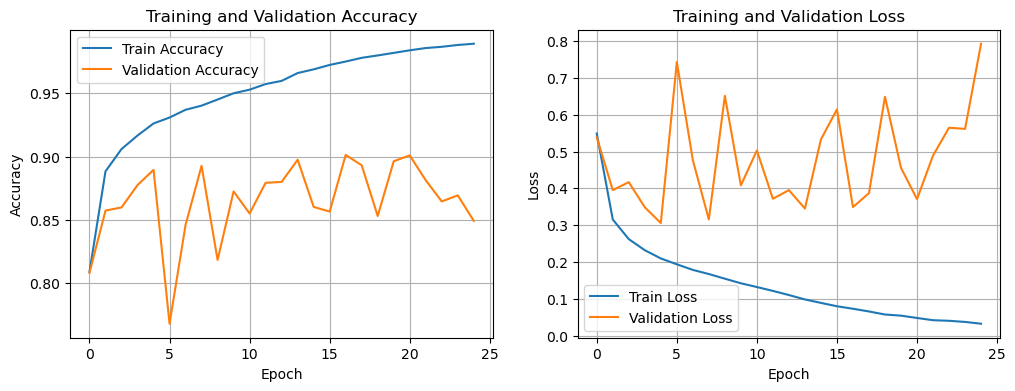

In [38]:
# --- 6. 모델 평가 ---
print("모델 평가 시작...")
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'테스트 손실 (Test loss): {loss:.4f}')
print(f'테스트 정확도 (Test accuracy): {accuracy:.4f}')
print("모델 평가 완료.")

# --- 학습 과정 시각화 (선택 사항) ---
# 학습 및 검증 정확도 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

# 학습 및 검증 손실 시각화
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# 사전학습된 이미지 분석 딥러닝 모델
분류 / 검출 / 트랙 / 포즈 등 가능. yolo1~11   
사람이 버스에 타는 사진을 올렸을때, 

In [40]:
# !pip install ultralytics
# !pip3 install torch torchvision torchaudio

In [3]:
from ultralytics import YOLO

## 1. 분류 

In [4]:
# 이미지 분류
model = YOLO("yolo11n-cls.pt")

In [5]:
len(model.names)

1000

In [6]:
results = model("BUS.jpeg", save=True)
# streetcar일 확률이 34%, trolleybus일 확률이 30%, ... - classify 폴더


image 1/1 C:\Users\campus4D019\Desktop\Python\BUS.jpeg: 224x224 streetcar 0.34, trolleybus 0.30, minibus 0.30, passenger_car 0.04, forklift 0.01, 20.7ms
Speed: 6.2ms preprocess, 20.7ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs\classify\predict2


## 2. 검출

In [7]:
model = YOLO("yolo11n.pt")     # 모델 검출 

In [8]:
results = model("BUS.jpeg", save=True)
# 사람이 6명, 버스가 1개, ... - detect 폴더


image 1/1 C:\Users\campus4D019\Desktop\Python\BUS.jpeg: 448x640 6 persons, 1 bus, 2 handbags, 82.1ms
Speed: 2.3ms preprocess, 82.1ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\detect\predict2


In [9]:
for i in results:
    # print(i.boxes.xywh)
    print(i.boxes.cls)

tensor([ 5.,  0.,  0.,  0.,  0.,  0.,  0., 26., 26.])


In [10]:
results

# 검출값 확인 가능

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

이미지 라벨링 사이트 - roboflow      
하나하나 노가다 작업을 해야돼서 좀 어렵긴 함

In [16]:
# !wget -O RockPaperScissors.zip https://universe.roboflow.com/ds/vHmqQxEOVX?key=pEz9eVNfhE

In [17]:
# import zipfile
# zip_ref = zipfile.ZipFile("/content/RockPaperScissors.zip", "r")
# zip_ref.extractall("/content/RockPaperScissors")     # 압축 풀어라
# zip_ref.close()

In [14]:
import requests
import zipfile
import os

# 경로 설정
zip_path = "Data/RockPaperScissors.zip"
extract_path = "Data/RockPaperScissors"  # "/content/" 디렉토리가 아닌 현재 작업 디렉토리에 풀림

# 다운로드
url = "https://universe.roboflow.com/ds/vHmqQxEOVX?key=pEz9eVNfhE"
response = requests.get(url)

with open(zip_path, "wb") as f:
    f.write(response.content)

# 압축 해제
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"압축이 '{extract_path}' 폴더에 성공적으로 풀렸습니다.")

압축이 'Data/RockPaperScissors' 폴더에 성공적으로 풀렸습니다.


In [19]:
# !cat "Data/RockPaperScissors/data.yaml"

In [21]:
with open("Data/RockPaperScissors/data.yaml", "r", encoding="utf-8") as f:
    content = f.read()
    print(content)

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 3
names: ['Paper', 'Rock', 'Scissors']

roboflow:
  workspace: roboflow-58fyf
  project: rock-paper-scissors-sxsw
  version: 14
  license: Private
  url: https://universe.roboflow.com/roboflow-58fyf/rock-paper-scissors-sxsw/dataset/14


In [22]:
# 경로를 새롭게 만들어줌
new_data = {"train" : "Data/RockPaperScissors/train/images",
            "test" : "Data/RockPaperScissors/test/images",
            "val" : "Data/RockPaperScissors/valid/images",
            "names" : ['Paper', 'Rock', 'Scissors'],
            "nc" : 3}       # number of class. 정답이 3개이므로 3

In [23]:
!pip install PyYAML

In [24]:
import yaml 

with open("Data/RockPaperScissors/new_data.yaml", "w") as f:
    yaml.dump(new_data, f)

In [25]:
model = YOLO("yolo11n.pt")
model.train(data = "Data/RockPaperScissors/new_data.yaml",
            epochs = 100, patience = 5, imgsz = 640)  
        # 몇번학습할지, 학습시 몇번 참을건지, 이미지 사이즈

Ultralytics 8.3.133  Python-3.12.7 torch-2.7.0+cpu CPU (12th Gen Intel Core(TM) i5-1235U)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Data/RockPaperScissors/new_data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=5, perspective=0.0, plots=True, pose=12.

RuntimeError: Dataset 'Data/RockPaperScissors/new_data.yaml' error  Dataset 'Data/RockPaperScissors/new_data.yaml' images not found, missing path 'C:\Users\campus4D019\Desktop\Python\datasets\Data\RockPaperScissors\Data\RockPaperScissors\valid\images'
Note dataset download directory is 'C:\Users\campus4D019\Desktop\Python\datasets'. You can update this in 'C:\Users\campus4D019\AppData\Roaming\Ultralytics\settings.json'

In [26]:
results = model("Data/RockPaperScissors/test/images", save = True)


image 1/304 C:\Users\campus4D019\Desktop\Python\Data\RockPaperScissors\test\images\10e0gvm_jpg.rf.3b68a834fab647f30a57fc3ea92d4cd2.jpg: 640x640 (no detections), 122.3ms
image 2/304 C:\Users\campus4D019\Desktop\Python\Data\RockPaperScissors\test\images\15208484cellblock_jpg.rf.95cbda1e169a66105fbf2aa22959a73b.jpg: 640x640 (no detections), 101.4ms
image 3/304 C:\Users\campus4D019\Desktop\Python\Data\RockPaperScissors\test\images\19171_298_298_1_0_jpg.rf.0024dfb25d7b5a13a78e94fca47ef004.jpg: 640x640 1 person, 2 chairs, 114.2ms
image 4/304 C:\Users\campus4D019\Desktop\Python\Data\RockPaperScissors\test\images\20061004021831_jpg.rf.8667d8aa5599deb901289c024eed4313.jpg: 640x640 15 chairs, 3 dining tables, 91.9ms
image 5/304 C:\Users\campus4D019\Desktop\Python\Data\RockPaperScissors\test\images\20220216_221550_jpg.rf.02a071a383151953fcf8671fc7fca3af.jpg: 640x640 1 person, 1 tv, 86.6ms
image 6/304 C:\Users\campus4D019\Desktop\Python\Data\RockPaperScissors\test\images\20220216_221819_jpg.rf.29